In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit, KFold, StratifiedShuffleSplit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn import svm

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.metrics import make_scorer

In [2]:
# Путь к тренировочному набору
path_train = 'train_house_A.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test_house_A.csv' # содержит только имя файла, без имен папок

In [3]:
df_train = pd.read_csv(path_train)

In [4]:
a = df_train.corr()
b=df_train.corr().drop('price', axis=1)
b[b>0.3].drop('12', axis=1).sum()

0     1.300066
1     0.000000
2     1.000000
3     1.000000
4     3.334758
5     1.355768
6     2.334210
7     2.975047
8     1.000000
9     1.355768
10    2.300604
11    1.000000
13    1.673262
14    1.000000
15    1.000000
16    1.441229
17    1.000000
18    1.000000
19    1.000000
20    2.902417
21    2.743142
22    1.000000
23    1.000000
24    1.000000
25    2.367804
26    1.000000
27    1.000000
28    2.141166
dtype: float64

In [5]:
features = a[df_train.corr()>0.3]['price'].dropna().index

In [6]:
df=df_train[features]
df

,price,0,4,6,7,12,13,16,21
0,5320000,0.405623,-0.223185,1.221991,-0.570187,-0.929397,1.517692,1.472618,0.047278
1,3465000,0.405623,-0.223185,-0.964205,-0.570187,-0.929397,-0.805741,-0.679063,0.047278
2,3500000,0.405623,-0.223185,-0.692084,-0.570187,0.224410,-0.805741,-0.679063,0.047278
3,3570000,0.405623,-0.223185,-0.696696,-0.570187,-0.929397,-0.805741,-0.679063,-1.308863
4,4130000,0.405623,-0.223185,-0.239163,-0.570187,0.224410,-0.805741,1.472618,1.403419
...,...,...,...,...,...,...,...,...,...
403,4550000,0.405623,-0.223185,-0.696696,-0.570187,0.224410,-0.805741,1.472618,0.047278
404,5250000,0.405623,-0.223185,-0.622901,-0.570187,0.224410,0.355976,-0.679063,0.047278
405,5950000,0.405623,-0.223185,0.640850,-0.570187,-0.929397,1.517692,-0.679063,0.047278
406,4319000,0.405623,-0.223185,-0.515897,-0.570187,-0.929397,-0.805741,-0.679063,-1.308863


In [7]:
y = (df.price)
X = df.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [9]:
gbrt = GradientBoostingRegressor(learning_rate=0.01, subsample=0.75, min_samples_split=5, n_estimators=500)
gbrt.fit(X_train, y_train)

# Make predictions
y_train_pred = gbrt.predict(X_train)
y_test_pred = gbrt.predict(X_test)

# Evaluate the model using Mean Absolute Percentage Error (MAPE)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print('MAPE on the training set: {:.3f}'.format(mape_train))
print('MAPE on the test set: {:.3f}'.format(mape_test))

MAPE on the training set: 13.946
MAPE on the test set: 22.275


In [10]:
df_test = pd.read_csv(path_test)

In [11]:
features = features.drop('price')

In [12]:
df_fin=df_test[features]
df_fin

,0,4,6,7,12,13,16,21
0,0.405623,-0.223185,0.488647,-0.570187,2.532024,-0.805741,1.472618,1.403419
1,0.405623,1.472449,0.391790,3.413810,0.224410,1.517692,-0.679063,1.403419
2,-2.465344,-0.223185,-1.303204,-0.570187,0.224410,-0.805741,-0.679063,0.047278
3,0.405623,-0.223185,1.169412,-0.570187,-0.929397,-0.805741,-0.679063,0.047278
4,0.405623,-0.223185,-0.486840,-0.570187,-0.929397,1.517692,-0.679063,-1.308863
...,...,...,...,...,...,...,...,...
132,0.405623,0.624632,0.391790,1.421812,2.532024,0.355976,1.472618,1.403419
133,-2.465344,-0.223185,-0.341555,-0.570187,-0.929397,0.355976,-0.679063,-1.308863
134,0.405623,-0.223185,0.336443,-0.570187,-0.929397,-0.805741,-0.679063,-1.308863
135,0.405623,-0.223185,-0.300045,-0.570187,0.224410,0.355976,-0.679063,-1.308863


In [13]:
prediction = gbrt.predict(df_fin)

In [14]:
y_predict = prediction

print('Предсказанные результаты: ', y_predict)

Предсказанные результаты:  [6342523.98845727 7128013.27960691 3079758.83058878 4683185.02385878
 4050685.62500938 3547520.78265741 8725633.5301319  8012432.48953694
 3981903.14208461 7176801.22354745 6736352.50610501 3524213.13575219
 5200653.82637803 3725398.05609101 3530172.3501193  7432767.00780177
 4250472.59678752 6753064.19899955 4009914.82370005 6699350.55993153
 3836013.25827131 3441476.51555895 5912517.24478631 3185774.41905612
 3300938.47039705 3507109.46254243 5589019.93053665 3501753.5476158
 3375513.09708066 4498263.37789419 3124780.17170179 7397852.62924607
 4871886.10367257 4479760.4345315  5483445.49053757 2933048.77399054
 4375942.79278781 2923071.35578764 4388453.6004912  5111958.87665395
 6842296.30502592 4846626.0141111  7047739.15306424 4878943.68117
 3507109.46254243 6124561.86151763 4408618.97337203 3543322.99336154
 5296518.70212394 2977830.91833627 4313879.63025561 2886317.5199743
 6561301.49768761 5532873.93449428 3503720.3677604  5603122.94998057
 5471116.714

In [15]:
features

Index(['0', '4', '6', '7', '12', '13', '16', '21'], dtype='object')

(137,) (137,)
Отрицательные цены -  0
Max Error: 5,233,954
 
----------------------
   MAPE Error: 19.69
----------------------


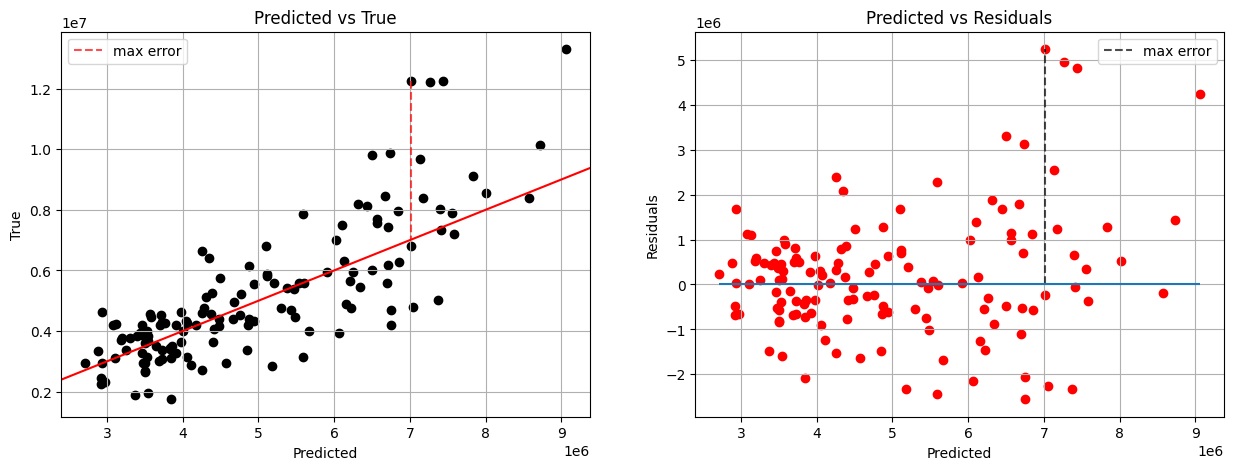

In [16]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_A.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [17]:
mask = features

import pickle
with open('saved_dictionary_a.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,1,1
1,16,airconditioning
2,6,area
3,4,area bathrooms
4,25,area bedrooms
5,10,area stories
6,5,basement
7,7,bathrooms
8,28,bathrooms stories
9,21,bedrooms
